# Api 사용 예제

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

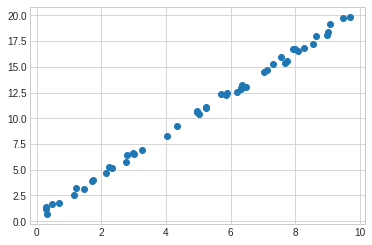

In [3]:
x = 10 * np.random.rand(50)
y = 2*x + np.random.rand(50)
plt.scatter(x, y);

In [4]:
# 1. 적절한 estimator 클래스를 임포트해서 모델의 클래스 선택
# linear_model = 선형 회귀, 릿지(Ridge), 라쏘(Lasso), 로지스틱 회귀 등 회귀 관련 알고리즘과 SGD(Stochastic  Gradient Descent) 알고리즘 제공
from sklearn.linear_model import LinearRegression


In [5]:
# 2. 클래스를 원하는 값으로 인스턴스화 해서 모델의 하이퍼 파라미터 선택
# LinearRegression = 연속적인 타깃을 예측하는 알고리즘
# fit_intercept = 모형에 상수항이 있는가 없는가를 결정하는 인수
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression
  - "copy_X=True" = 입력데이터를 복사 할것인지 여부(원본 보존여부)
  - "fit_intercept=True" =  모형에 상수항이 있는가 없는가를 결정하는 인수
  - "n_jobs=None" =  모델 계산에 사용될 작업 개수
  - "normalize=False"



In [7]:
# 3. 데이터를 특징 배열과 대상 벡터로 배치
# newaxis = numpy array의 차원을 늘려준다
X = x[:, np.newaxis]
X

array([[5.88821764],
       [7.57241306],
       [4.35069971],
       [6.34806118],
       [2.25106984],
       [2.34348015],
       [2.79458585],
       [6.31851096],
       [5.24852144],
       [0.48158646],
       [2.75932969],
       [5.84905807],
       [9.02440104],
       [6.4846708 ],
       [7.03594423],
       [1.46735513],
       [5.01677112],
       [4.02065536],
       [0.32234146],
       [7.920417  ],
       [0.30191183],
       [9.69617813],
       [2.97326471],
       [8.28805569],
       [7.6714729 ],
       [7.73668096],
       [2.99965971],
       [6.31613415],
       [7.31437994],
       [5.71422052],
       [0.69941829],
       [1.70386652],
       [5.25511927],
       [8.00033421],
       [2.14406583],
       [1.73489681],
       [6.20266078],
       [8.64431522],
       [4.95641278],
       [0.27353993],
       [1.16696876],
       [8.97630671],
       [7.129655  ],
       [8.09629602],
       [4.95715872],
       [9.47874802],
       [3.25663943],
       [9.093

In [8]:
# 4. 모델 인스턴스의 fit() 메서드를 호출해서 모델을 데이터에 적합(학습) 한다.
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
model.coef_

array([1.99537092])

In [10]:
model.intercept_

0.508102870314465

In [14]:
# 5. 모델을 새 데이터에 적용한다
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

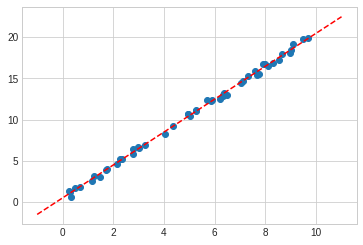

In [16]:
plt.scatter(x, y)
plt.plot(xfit, yfit, '--r');

In [17]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
print(diabetes.keys())

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [18]:
# .data는 피쳐값을 포함한다.
print(diabetes.data)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


In [19]:
# target = 회기목적용 수치 데이터
print(diabetes.target)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [22]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [23]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [24]:
print(diabetes.data_filename)
print(diabetes.target_filename)

/usr/local/lib/python3.7/dist-packages/sklearn/datasets/data/diabetes_data.csv.gz
/usr/local/lib/python3.7/dist-packages/sklearn/datasets/data/diabetes_target.csv.gz


# model_selection 모듈

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
# test_size = train 과 test 나누기 비율
# 여러개를 표현할때 대문자 X를 쓴다
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size = 0.3)

model = LinearRegression()
model.fit(X_train, y_train)     # 모델학습

print("학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.526070178654185
평가 데이터 점수 : 0.46761989425704553


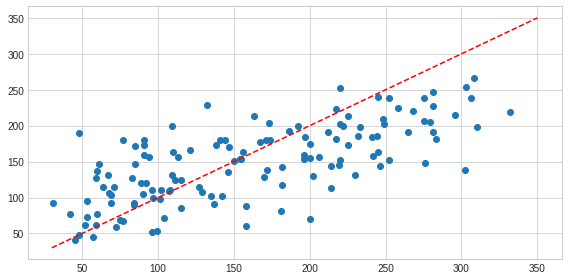

In [33]:
import matplotlib.pyplot as plt

predicted = model.predict(X_test)
expected = y_test
plt.figure(figsize=(8, 4))
plt.scatter(expected, predicted)
plt.plot([30, 350], [30, 350], '--r')
plt.tight_layout()

# cross_val_score() : 교차검증

In [36]:
from sklearn.model_selection import cross_val_score, cross_validate

scores = cross_val_score(model, diabetes.data, diabetes.target, cv=5)

print("교차검증 정확도 : {}".format(scores))
print("교차검증 정확도 : {} +/- {}".format(np.mean(scores), np.std(scores)))

교차검증 정확도 : [0.42955643 0.52259828 0.4826784  0.42650827 0.55024923]
교차검증 정확도 : 0.48231812211149394 +/- 0.049266197765632194


In [37]:
# GridSearchCV : 교차 검증과 최적 하이퍼 파라미터 찾기
#             다양한 모델의 훈련과정을 자동화 하고, 교차 검사를 사용해 최적값을 제공하는 도구
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge    # 알파값을 가져온다?
import pandas as pd


alpha = [0.001, 0.01, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)

gs = GridSearchCV(estimator=Ridge(), param_grid=param_grid, cv=10)
result = gs.fit(diabetes.data, diabetes.target)

print("최적 점수 : {}".format(result.best_score_))
print("최적 파라미터 : {}".format(result.best_params_))
print(gs.best_estimator_)
pd.DataFrame(result.cv_results_)


최적 점수 : 0.4629096843692452
최적 파라미터 : {'alpha': 0.01}
Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001095,0.000808,0.000752,0.000058,0.001,{'alpha': 0.001},0.554415,0.233686,0.356799,0.620259,0.267033,0.619397,0.419907,0.433019,0.433431,0.684984,0.462293,0.145848,2
1,0.000997,0.000208,0.000836,0.000148,0.01,{'alpha': 0.01},0.546297,0.244132,0.368901,0.613732,0.271717,0.623089,0.426074,0.424759,0.429484,0.680912,0.462910,0.141446,1
2,0.000800,0.000013,0.000738,0.000014,1,{'alpha': 1},0.421593,0.168442,0.358004,0.512608,0.284928,0.514264,0.388246,0.484448,0.396502,0.525132,0.405417,0.108385,3
3,0.000807,0.000031,0.000758,0.000080,10,{'alpha': 10},0.159386,-0.081177,0.152190,0.165690,0.119349,0.186933,0.158147,0.203748,0.153627,0.189440,0.140733,0.077298,4
4,0.000904,0.000293,0.000791,0.000138,100,{'alpha': 100},0.012468,-0.234480,0.013522,-0.012820,0.004838,0.022647,0.022028,-0.009908,0.015589,0.026427,-0.013969,0.074561,5
5,0.000787,0.000010,0.000736,0.000005,1000,{'alpha': 1000},-0.009602,-0.258118,-0.007849,-0.038479,-0.012933,-0.000932,0.001768,-0.042679,-0.004652,0.002744,-0.037073,0.075191,6


In [39]:
# multiprocessing을 이용한 GridSearchCV
import multiprocessing
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()

param_grid = [
              {
                  'penalty': ['l1', 'l2']
                , 'C' : [0.5, 1.0, 1.5, 1.8, 2.0, 2.4]
              }              
            ]
gs = GridSearchCV(estimator = LogisticRegression(), param_grid = param_grid
                  , scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

result = gs.fit(iris.data, iris.target)

print("최적 점수 : {}".format(result.best_score_))
print("최적 파라미터 : {}".format(result.best_params_))
print(gs.best_estimator_)
pd.DataFrame(result.cv_results_)

최적 점수 : 0.9800000000000001
최적 파라미터 : {'C': 2.4, 'penalty': 'l2'}
LogisticRegression(C=2.4, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000098,0.000027,0.000000,0.000000,0.5,l1,"{'C': 0.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
1,0.049975,0.004970,0.000555,0.000026,0.5,l2,"{'C': 0.5, 'penalty': 'l2'}",1.0,0.933333,1.0,0.933333,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.966667,0.033333,6
2,0.000101,0.000060,0.000000,0.000000,1,l1,"{'C': 1.0, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
3,0.056782,0.006759,0.000540,0.000039,1,l2,"{'C': 1.0, 'penalty': 'l2'}",1.0,0.933333,1.0,1.000000,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,2
4,0.000062,0.000014,0.000000,0.000000,1.5,l1,"{'C': 1.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
5,0.049505,0.002195,0.000545,0.000031,1.5,l2,"{'C': 1.5, 'penalty': 'l2'}",1.0,0.933333,1.0,1.000000,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,2
6,0.000068,0.000014,0.000000,0.000000,1.8,l1,"{'C': 1.8, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
7,0.056735,0.010082,0.000558,0.000030,1.8,l2,"{'C': 1.8, 'penalty': 'l2'}",1.0,0.933333,1.0,1.000000,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,2
8,0.000073,0.000015,0.000000,0.000000,2,l1,"{'C': 2.0, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
9,0.059966,0.008175,0.000574,0.000099,2,l2,"{'C': 2.0, 'penalty': 'l2'}",1.0,0.933333,1.0,1.000000,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,2


# preprocessing 데이터 전처리 모듈
  - 표준화 방법
  - 정규화 방법

# StandardScaler : 표준화 클래스

In [43]:
iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df)
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
iris_df_scaled.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.690315e-15,-1.842970e-15,-1.698641e-15,-1.409243e-15
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [46]:
X_train, X_test, y_train, y_test = train_test_split(iris_df_scaled, iris.target, test_size = 0.3)

model = LogisticRegression()
model.fit(X_train, y_train)

print("훈련 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

훈련 데이터 점수 : 0.9619047619047619
평가 데이터 점수 : 0.9333333333333333


# MinMaxScaler : 정규화 클래스

In [49]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
iris_scaled = scaler.fit_transform(iris_df)
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
iris_df_scaled.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [50]:
X_train, X_test, y_train, y_test = train_test_split(iris_df_scaled, iris.target, test_size=0.3)

model = LogisticRegression()
model.fit(X_train, y_train)

print("훈련 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

훈련 데이터 점수 : 0.9523809523809523
평가 데이터 점수 : 0.8666666666666667


# 성능 평가 지표

## 정확도(Accuracy)
  - 정확도는 전체 예측 데이터 건수 중 예측결과가 동일한 데이터 건수로 계산
  - scikit-learn에서는 accuracy_score함수를 제공

In [53]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2
                           , n_redundant=0, n_clusters_per_class=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model = LogisticRegression()
model.fit(X_train, y_train)

print("훈련 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

predict = model.predict(X_test)
print("정확도 : {}".format(accuracy_score(y_test, predict)))

훈련 데이터 점수 : 0.9885714285714285
평가 데이터 점수 : 0.9866666666666667
정확도 : 0.9866666666666667


### 오차행렬(Confusion Matrix)
  - True Negative : 예측값을 Negative값0으로 예측했고, 실제값도 Negative값 0
  - False Positive  : 예측값을 Positive값1로 예측했고, 실제값도 Negative값 0
  - False Negative : 예측값을 Negative값0으로 예측했고, 실제값도 Positive값 1
  - True Postitive : 예측값을 Positive값1으로 예측했고, 실제값도 Positive값 1

In [54]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_test, y_pred=predict)
print(confmat)

[[138   0]
 [  4 158]]


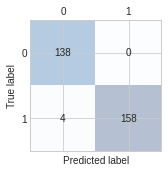

In [56]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
    ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

## 정밀도(Precision)와 재현율(Recall)
  - 정밀도 = TP / (FP + TP)
  - 재현율 = TP / (FN + TP)
  - 정확도 = (TN + TP) / (TN + FP + FN + TP)
  - 오류율 = (FN + FP) / (TN + FP + FN + TP)

In [57]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, predict)
recall = recall_score(y_test, predict)

print("정밀도 : {}".format(precision))
print("재현율 : {}".format(recall))

정밀도 : 1.0
재현율 : 0.9753086419753086


## F1 Score(F-measure)
  - 정밀도와 재현율을 결합한지표
  - 정밀도와 재현율이 어느 한쪽으로 치우치지 않을 때 높은 값을 가진다

In [60]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, predict)
print("F1 Score : {}".format(f1))

F1 Score : 0.9875


## ROC 곡선과 AUC
  - ROC 곡선은 FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지 나타내는 곡선
    - TPR(True Positive Rate) : TP / (FN + TP), 재현율
    - TNR(True Negative Rate) : TN / (FP + TN)
    - FPR(False Positive Rate) : FP / (FP + TN), 1-TNR
  - AUC(Area Under Curve)값은 ROC 곡선 밑에 면적을 구한 값(1이 가까울수록 않 좋은 값)

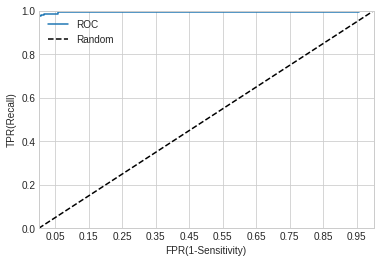

In [65]:
from sklearn.metrics import roc_curve

pred_proba_class1 = model.predict_proba(X_test)[:, 1]
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

plt.plot(fprs, tprs, label='ROC')
plt.plot([0, 1], [0, 1], '--k', label='Random')
start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1), 2))
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('FPR(1-Sensitivity)')
plt.ylabel('TPR(Recall)')
plt.legend();

In [66]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, predict)

print("ROC AUC Score : {}".format(roc_auc))

ROC AUC Score : 0.9876543209876543
